# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 9.1MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx


In [0]:
downloaded_2 = drive.CreateFile({'id':id}) 
downloaded_2.GetContentFile('train_data.csv')  
project_data = pd.read_csv('train_data.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe


In [0]:
downloaded_3 = drive.CreateFile({'id':id}) 
downloaded_3.GetContentFile('resources.csv')  
resources_data = pd.read_csv('resources.csv')
# Dataset is now stored in a Pandas Dataframe

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)


Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## 1.5 Preparing data for models

Pre-processing teacher prefix:-

In [0]:
project_data = project_data.replace({'teacher_prefix':np.nan},"")
a=list(project_data['teacher_prefix'].unique())

In [0]:
a.pop(4)

''

In [0]:
a

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']

In [0]:
project_data.project_grade_category = project_data.project_grade_category.str.replace('\s+','_')
project_data.project_grade_category = project_data.project_grade_category.str.replace('-','_')

In [0]:
price_data=resource_data.groupby('id').agg({'price':'sum','quantity':'sum'}).reset_index()

In [0]:
project_data=pd.merge(project_data, price_data, on='id', how='left')

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [0]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Train-test splitting:-

In [0]:
Y = project_data['project_is_approved'].values 

In [0]:
X = project_data.drop('project_is_approved', axis=1)

In [0]:
X.columns.values

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity'], dtype=object)

In [0]:
X.shape

(109248, 19)

In [0]:
Y.shape

(109248,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xt, Xtest, Yt, Ytest = train_test_split(X, Y, test_size=0.33, random_state=0, stratify= Y)
Xtr, Xcv, Ytr, Ycv = train_test_split(Xt, Yt, test_size=0.33, random_state=0, stratify= Yt)

In [0]:
print("The shape of training data is:")
print(Xtr.shape)
print(Ytr.shape)
print('==========')
print("The shape of test data is:")
print(Xtest.shape)
print(Ytest.shape)
print('==========')
print("The shape of CV data is:")
print(Xcv.shape)
print(Ycv.shape)

The shape of training data is:
(49041, 19)
(49041,)
The shape of test data is:
(36052, 19)
(36052,)
The shape of CV data is:
(24155, 19)
(24155,)


# Preprocessing essay data:-

In [0]:
preprocessed_1=[]
for sent in tqdm(Xtr['essay'].values):    
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_1.append(sentance.strip())


100%|██████████| 49041/49041 [00:25<00:00, 1926.93it/s]


In [0]:
preprocessed_1[1000]

'the students spark curiosity i love they interested learning change world help people i want everything i keep passion alive my classroom filled students curious excited learning they passion nature we currently working garden project also done project monarch butterflies we project based learning school students drive learn the students always choose project helping people nature these resources allow students explore passions stem gardening we love giving students time complete stem challenges get wheels turning creativity flowing we also incorporating art project making steam project the students use paints express learned this project make difference allowing students may not opportunity explore develop passion stem use stem bundles paint'

In [0]:
preprocessed_2=[]
for sent in tqdm(Xtest['essay'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_2.append(sentance.strip())


100%|██████████| 36052/36052 [00:19<00:00, 1897.27it/s]


In [0]:
preprocessed_3=[]
for sent in tqdm(Xcv['essay'].values):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_3.append(sentance.strip())


100%|██████████| 24155/24155 [00:12<00:00, 1924.10it/s]


# Preprocessing project title data:-

In [0]:
preprocessed_title_1=[]
for sent in tqdm(Xtr['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_1.append(sentance.strip())


100%|██████████| 49041/49041 [00:01<00:00, 40281.27it/s]


In [0]:
preprocessed_title_2=[]
for sent in tqdm(Xtest['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_2.append(sentance.strip())


100%|██████████| 36052/36052 [00:00<00:00, 40347.32it/s]


In [0]:
preprocessed_title_3=[]
for sent in tqdm(Xcv['project_title'].values):
    sent = sent.replace('\\r', ' ')   
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent=' '.join(e.lower() for e in sent.split() if e not in stopwords)
    sentance = decontracted(sent)
    preprocessed_title_3.append(sentance.strip())


100%|██████████| 24155/24155 [00:00<00:00, 39622.06it/s]


# Features to be considered 
We are going to consider

school_state : categorical data
clean_categories : categorical data
clean_subcategories : categorical data
project_grade_category : categorical data
teacher_prefix : categorical data

project_title : text data

text : text data

project_resource_summary: text data (optinal)

quantity : numerical (optinal)

sentiment's score of essay data

teacher_number_of_previously_posted_projects : numerical

price : numerical

number of words in essay

number of words in projects_title

# 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

 1. Subject Categories:-

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
subject_categories_vect_1= vectorizer_1.fit_transform(Xtr['clean_categories'].values)
print(vectorizer_1.get_feature_names())
print('The shape of the train matrix after one hot encoding is:', subject_categories_vect_1.shape)
subject_categories_vect_2=vectorizer_1.transform(Xtest['clean_categories'].values)
subject_categories_vect_3=vectorizer_1.transform(Xcv['clean_categories'].values)
print('The shape of the CV matrix after one hot encoding is:', subject_categories_vect_2.shape)
print('The shape of the test matrix after one hot encoding is:', subject_categories_vect_3.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
The shape of the train matrix after one hot encoding is: (49041, 9)
The shape of the CV matrix after one hot encoding is: (36052, 9)
The shape of the test matrix after one hot encoding is: (24155, 9)


2. Subject sub_categories:- 

In [0]:
# we use count vectorizer to convert the values into one 
vectorizer_2=CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_vect_1= vectorizer_2.fit_transform(Xtr['clean_subcategories'].values)
print(vectorizer_2.get_feature_names())
print('The shape of train encoded subcategories is:',sub_categories_vect_1.shape)
sub_categories_vect_2=vectorizer_2.transform(Xtest['clean_subcategories'].values)
sub_categories_vect_3=vectorizer_2.transform(Xcv['clean_subcategories'].values)
print('The shape of the CV encoded subcategories is:', sub_categories_vect_2.shape)
print('The shape of the test encoded subcategories is:', sub_categories_vect_3.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
The shape of train encoded subcategories is: (49041, 30)
The shape of the CV encoded subcategories is: (36052, 30)
The shape of the test encoded subcategories is: (24155, 30)


3. School State

In [0]:
vectorizer_3=CountVectorizer(lowercase=False, binary=True)
school_state_vect_1 = vectorizer_3.fit_transform(Xtr['school_state'].values)
print(vectorizer_3.get_feature_names())
school_state_vect_2 = vectorizer_3.transform(Xtest['school_state'].values)
school_state_vect_3 = vectorizer_3.transform(Xcv['school_state'].values)
print('The shape of the Train school state encoded subcategories is:', school_state_vect_1.shape)
print('The shape of the CV school state encoded subcategories is:', school_state_vect_2.shape)
print('The shape of the Test school state encoded subcategories is:', school_state_vect_3.shape)


['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
The shape of the Train school state encoded subcategories is: (49041, 51)
The shape of the CV school state encoded subcategories is: (36052, 51)
The shape of the Test school state encoded subcategories is: (24155, 51)


4. Teacher Prefix:-

In [0]:
vectorizer_4=CountVectorizer(vocabulary=a,lowercase=False, binary=True)
prefix_1 = vectorizer_4.fit_transform(Xtr['teacher_prefix'].values)
print(vectorizer_4.get_feature_names())
prefix_2 = vectorizer_4.transform(Xtest['teacher_prefix'].values)
prefix_3 = vectorizer_4.transform(Xcv['teacher_prefix'].values)
print('The shape of the Train encoded teacher prefix is:', prefix_1.shape)
print('The shape of the CV encoded teacher prefix is:', prefix_2.shape)
print('The shape of the Test encoded teacher prefix is:', prefix_3.shape)



['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
The shape of the Train encoded teacher prefix is: (49041, 5)
The shape of the CV encoded teacher prefix is: (36052, 5)
The shape of the Test encoded teacher prefix is: (24155, 5)


5. Project grade Category

In [0]:
vectorizer_5=CountVectorizer(lowercase=False, binary= True)
grade_category_vec_1=vectorizer_5.fit_transform(Xtr['project_grade_category'].values)
grade_category_vec_2=vectorizer_5.transform(Xtest['project_grade_category'].values)
grade_category_vec_3=vectorizer_5.transform(Xcv['project_grade_category'].values)
print(vectorizer_5.get_feature_names())
print('The shape of the Train encoded teacher_prefix is:', grade_category_vec_1.shape)
print('The shape of the CV encoded teacher_prefix is:', grade_category_vec_2.shape)
print('The shape of the Test encodedteacher_prefix is:', grade_category_vec_3.shape)


['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
The shape of the Train encoded teacher_prefix is: (49041, 4)
The shape of the CV encoded teacher_prefix is: (36052, 4)
The shape of the Test encodedteacher_prefix is: (24155, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

1. Essay data:- 

In [0]:
vectorizer_6 = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_6.fit(preprocessed_1)
bow1=vectorizer_6.transform(preprocessed_1)
bow2=vectorizer_6.transform(preprocessed_2)
bow3=vectorizer_6.transform(preprocessed_3)


In [0]:
print(bow1.shape)
print(bow2.shape)
print(bow3.shape)

2. Project title:-

In [0]:
vectorizer_7 = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_7.fit(preprocessed_title_1)
bow4=vectorizer_7.transform(preprocessed_title_1)
bow5=vectorizer_7.transform(preprocessed_title_2)
bow6=vectorizer_7.transform(preprocessed_title_3)


In [0]:
print(bow4.shape)
print(bow5.shape)
print(bow6.shape)

#### 1.5.2.2 TFIDF vectorizer

1. Essay data:-

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_8 = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_8.fit(preprocessed_1)
tfidf_1 = vectorizer_8.transform(preprocessed_1)
tfidf_2 = vectorizer_8.transform(preprocessed_2)
tfidf_3 = vectorizer_8.transform(preprocessed_3)
print('The shape of essay tfidf train data is',tfidf_1.shape)
print('The shape of essay tfidf test data is',tfidf_2.shape)
print('The shape of essay tfidf CV data is',tfidf_3.shape)

The shape of essay tfidf train data is (49041, 5000)
The shape of essay tfidf test data is (36052, 5000)
The shape of essay tfidf CV data is (24155, 5000)


2. Project Title:- 

In [0]:
vectorizer_9 = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer_9.fit(preprocessed_title_1)
tfidf_4=vectorizer_9.transform(preprocessed_title_1)
tfidf_5=vectorizer_9.transform(preprocessed_title_2)
tfidf_6=vectorizer_9.transform(preprocessed_title_3)


In [0]:
print(tfidf_4.shape)
print(tfidf_5.shape)
print(tfidf_6.shape)

In [0]:
if not os.path.exists('glove.6B.zip'):
    ! wget http://nlp.stanford.edu/data/glove.6B.zip
if not os.path.exists('glove.6B.300d.txt'):
    ! unzip glove.6B.zip

--2019-07-13 21:28:26--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-07-13 21:28:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-07-13 21:28:27--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

# 3. AVG W2V:-

In [0]:
preprocessed = preprocessed_1 + preprocessed_2 + preprocessed_3
preprocessed_title = preprocessed_title_1 + preprocessed_title_2 + preprocessed_title_3


# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.6B.300d.txt')

# ============================

# ============================

words = []
for i in preprocessed:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




1090it [00:00, 10898.69it/s]

Loading Glove Model


400000it [00:36, 10926.22it/s]


Done. 400000  words loaded!
all the words in the coupus 16975547
the unique words in the coupus 58763
The number of words that are present in both glove vectors and our coupus 44229 ( 75.267 %)
word 2 vec length 44229


In [0]:
words = []
for i in preprocessed:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




all the words in the coupus 16975547
the unique words in the coupus 58763
The number of words that are present in both glove vectors and our coupus 44229 ( 75.267 %)
word 2 vec length 44229


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

Avg_W2V on Essay:-

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_1.append(vector)

print(len(avg_w2v_vectors_1))
print(len(avg_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [00:14<00:00, 3461.87it/s]

49041
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_2.append(vector)

print(len(avg_w2v_vectors_2))
print(len(avg_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [00:10<00:00, 3597.03it/s]

36052
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_3.append(vector)

print(len(avg_w2v_vectors_3))
print(len(avg_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:06<00:00, 3554.04it/s]

24155
300


Avg_W2V on Project_title:-

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_1.append(vector)

print(len(avg_w2v_title_1))
print(len(avg_w2v_title_1[0]))

100%|██████████| 49041/49041 [00:00<00:00, 72960.86it/s]

49041
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_2.append(vector)

print(len(avg_w2v_title_2))
print(len(avg_w2v_title_2[0]))

100%|██████████| 36052/36052 [00:00<00:00, 72682.61it/s]

36052
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_3.append(vector)

print(len(avg_w2v_title_3))
print(len(avg_w2v_title_3[0]))

100%|██████████| 24155/24155 [00:00<00:00, 72612.62it/s]

24155
300


TFIDF W2V on Essay:-

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_1 = TfidfVectorizer()
tfidf_model_1.fit(preprocessed_1)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_1 = dict(zip(tfidf_model_1.get_feature_names(), list(tfidf_model_1.idf_)))
tfidf_words_1 = set(tfidf_model_1.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_1.append(vector)

print(len(tfidf_w2v_vectors_1))
print(len(tfidf_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [01:22<00:00, 592.31it/s]

49041
300


In [0]:
tfidf_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_2.append(vector)

print(len(tfidf_w2v_vectors_2))
print(len(tfidf_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [01:01<00:00, 584.45it/s]

36052
300


In [0]:
tfidf_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_3.append(vector)

print(len(tfidf_w2v_vectors_3))
print(len(tfidf_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:41<00:00, 580.15it/s]

24155
300


# Tf-idf W2V on project_title:-

In [0]:
tfidf_title_model_1 = TfidfVectorizer()
tfidf_title_model_1.fit(preprocessed_title_1)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary1 = dict(zip(tfidf_title_model_1.get_feature_names(), list(tfidf_title_model_1.idf_)))
tfidf_title_words_1 = set(tfidf_title_model_1.get_feature_names())

In [0]:
tfidf_title_w2v_vectors_1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_1): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_1.append(vector)

print(len(tfidf_title_w2v_vectors_1))
print(len(tfidf_title_w2v_vectors_1[0]))

100%|██████████| 49041/49041 [00:01<00:00, 29334.94it/s]

49041
300


In [0]:
tfidf_title_w2v_vectors_2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_2): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_2.append(vector)

print(len(tfidf_title_w2v_vectors_2))
print(len(tfidf_title_w2v_vectors_2[0]))

100%|██████████| 36052/36052 [00:01<00:00, 30208.41it/s]

36052
300


In [0]:
tfidf_title_w2v_vectors_3 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title_3): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words_1):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary1[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_title_w2v_vectors_3.append(vector)

print(len(tfidf_title_w2v_vectors_3))
print(len(tfidf_title_w2v_vectors_3[0]))

100%|██████████| 24155/24155 [00:00<00:00, 30361.82it/s]

24155
300


### 1.5.3 Vectorizing Numerical features

Vectorizing price data:-

In [0]:
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(1,-1)

price_scalar = Normalizer()
price_scalar.fit(Xtr['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_1 = price_scalar.transform(Xtr['price'].values.reshape(1, -1))
price_standardized_2 = price_scalar.transform(Xtest['price'].values.reshape(1, -1))
price_standardized_3 = price_scalar.transform(Xcv['price'].values.reshape(1, -1))

print(price_standardized_1.shape)
print(price_standardized_2.shape)
print(price_standardized_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
price_standardized_1

array([[0.00893773, 0.00095084, 0.00174673, ..., 0.00453539, 0.00366684,
        0.00254176]])

Vectorizing previous projects data:-

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

previousproject_scalar = Normalizer()
previousproject_scalar.fit(Xtr['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previousproject_standardized_1 = previousproject_scalar.transform(Xtr['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previousproject_standardized_2 = previousproject_scalar.transform(Xtest['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
previousproject_standardized_3 = previousproject_scalar.transform(Xcv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print(previousproject_standardized_1.shape)
print(previousproject_standardized_2.shape)
print(previousproject_standardized_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
previousproject_standardized_1

array([[0.        , 0.        , 0.00045655, ..., 0.00060873, 0.00045655,
        0.00076092]])

Vectorizing price data:-

In [0]:
from sklearn.preprocessing import Normalizer

quantity_vect=Normalizer()
quantity_vect_1=quantity_vect.fit_transform(Xtr['quantity'].values.reshape(1,-1))
quantity_vect_2=quantity_vect.transform(Xtest['quantity'].values.reshape(1,-1))
quantity_vect_3=quantity_vect.transform(Xcv['quantity'].values.reshape(1,-1))
print(quantity_vect_1.shape)
print(quantity_vect_2.shape)
print(quantity_vect_3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
quantity_vect_1

array([[0.00070946, 0.00496619, 0.00014189, ..., 0.00042567, 0.00042567,
        0.00014189]])

### 1.5.4 Merging all the above features

- We need to merge all the numerical vectors i.e catogorical, text, numerical vectors

Set-1 :-

In [0]:
from scipy.sparse import hstack
X_train_1 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, bow1, bow4, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_1.shape

(49041, 8858)

In [0]:
from scipy.sparse import hstack
X_test_1 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, bow2, bow5, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_1.shape

(36052, 8858)

In [0]:
from scipy.sparse import hstack
X_cv_1 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, bow3, bow6, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_1.shape

(24155, 8858)

Set-2 :-

In [0]:
from scipy.sparse import hstack
X_train_2 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, tfidf_1, tfidf_4, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_2.shape

(49041, 8858)

In [0]:
from scipy.sparse import hstack
X_test_2 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, tfidf_2, tfidf_5, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_2.shape

(36052, 8858)

In [0]:
from scipy.sparse import hstack
X_cv_2 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, tfidf_3, tfidf_6, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_2.shape

(24155, 8858)

In [0]:
1234

Set-3 :-

In [0]:
from scipy.sparse import hstack
X_train_3 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, avg_w2v_vectors_1, avg_w2v_title_1, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_3.shape

(49041, 702)

In [0]:
from scipy.sparse import hstack
X_test_3 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, avg_w2v_vectors_2, avg_w2v_title_2, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_3.shape

(36052, 702)

In [0]:
from scipy.sparse import hstack
X_cv_3 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, avg_w2v_vectors_3, avg_w2v_title_3, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_3.shape

(24155, 702)

Set-4 :-

In [0]:
from scipy.sparse import hstack
X_train_4 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, tfidf_w2v_vectors_1, tfidf_title_w2v_vectors_1, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T))
X_train_4.shape

(49041, 702)

In [0]:
from scipy.sparse import hstack
X_test_4 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, tfidf_w2v_vectors_2, tfidf_title_w2v_vectors_2, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T))
X_test_4.shape

(36052, 702)

In [0]:
from scipy.sparse import hstack
X_cv_4 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, tfidf_w2v_vectors_3, tfidf_title_w2v_vectors_3, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T))
X_cv_4.shape

(24155, 702)

# Assignment 4:Support Vector Machines


<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>Support Vector Machines:- </h1>

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>ApplySupport Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Logistic Regression on BOW,<font color='red'> SET 1</font>

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
auc_1=[]
auc_2=[]
log_alpha_1=[]

In [0]:
alpha_1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [0]:
print(X_train_1.shape)
print(Ytr.shape)

(49041, 8858)
(49041,)


In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(alpha_1):
    clf=SGDClassifier(loss='hinge', alpha=i, n_jobs=-1, class_weight='balanced')
    clf.fit(X_train_1, Ytr)
    Y_1=clf.predict(X_train_1)
    roc_auc_1=roc_auc_score(Ytr, Y_1)
    auc_1.append(roc_auc_1)
    Y_2=clf.predict(X_cv_1)
    roc_auc_2=roc_auc_score(Ycv, Y_2)
    auc_2.append(roc_auc_2)

100%|██████████| 9/9 [00:16<00:00,  1.13s/it]


In [0]:
import math
log_alpha_1=[math.log(i) for i in alpha_1]
log_alpha_1

[-9.210340371976182,
 -6.907755278982137,
 -4.605170185988091,
 -2.3025850929940455,
 0.0,
 2.302585092994046,
 4.605170185988092,
 6.907755278982137,
 9.210340371976184]

Auc values v/s log(alpha) plot:-

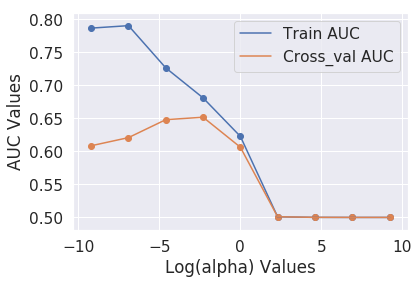

In [0]:
plt.plot(log_alpha_1, auc_1, label='Train AUC')
plt.plot(log_alpha_1, auc_2, label='Cross_val AUC')
plt.scatter(log_alpha_1, auc_1)
plt.scatter(log_alpha_1, auc_2)
plt.xlabel('Log(alpha) Values')
plt.ylabel('AUC Values')
plt.legend()
plt.show()

# Observation:-

In [0]:
print('From the above plot, alpha={} results on {} and {} scores on train and CV data'.format(0.01, auc_1[2], auc_2[2]))

From the above plot, alpha=0.01 results on 0.7264068635520111 and 0.6479720785100705 scores on train and CV data


# Preparing Model-1 with best alpha:-

In [0]:

SVM_1=SGDClassifier(loss='hinge', alpha=0.01, class_weight='balanced')
SVM_1.fit(X_train_1, Ytr)
y_pred= SVM_1.predict(X_test_1)
roc_auc= roc_auc_score(Ytest, y_pred)
print('The AUC score with alpha={} on test data is: {}'.format(0.01, roc_auc))

The AUC score with alpha=0.01 on test data is: 0.6589150681281759


# ROC Curve:-

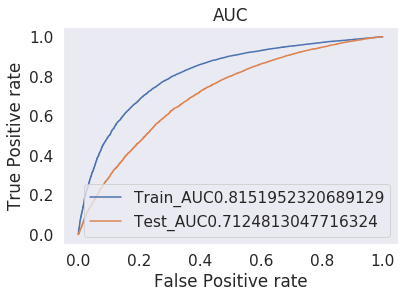

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=SGDClassifier(loss='hinge', alpha=0.01, class_weight='balanced')
clf_1=CalibratedClassifierCV(clf, method='sigmoid', cv=3)
clf_1.fit(X_train_1, Ytr)
Y_1=clf_1.predict_proba(X_train_1)
Y_1=Y_1[:,1]
train_fpr, train_tpr, tr_threshold = roc_curve(Ytr, Y_1)
Y_2=clf_1.predict_proba(X_test_1)
Y_2=Y_2[:,1]
test_fpr, test_tpr, te_threshold = roc_curve(Ytest, Y_2)
plt.plot(train_fpr, train_tpr, label='Train_AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test_AUC'+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('AUC')
plt.legend()
plt.grid()
plt.show()

# Observations:-

In [0]:
print(' The AUC scores with best alpha={} on train and test data are {} and {}'.format(0.01,auc(train_fpr, train_tpr), auc(test_fpr, test_tpr)))

 The AUC scores with best alpha=0.01 on train and test data are 0.8151952320689129 and 0.7124813047716324


# Confusion Matrix on Train data:-

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
clf=SGDClassifier(loss='hinge', alpha=0.01, class_weight='balanced')
clf.fit(X_train_1, Ytr)
Y_1=clf.predict(X_train_1)
Y_2=clf.predict(X_test_1)


print("="*100)
print("Train confusion matrix") 
print(confusion_matrix(Ytr, Y_1))


Train confusion matrix
[[ 5949  1477]
 [13853 27762]]


In [0]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(Ytr, Y_1))

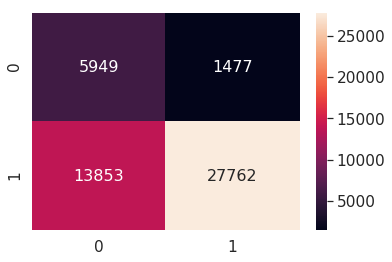

In [0]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')


# Confusion Matrix on Test data:-

In [0]:
print('Test confusion matrix')
confusion_matrix(Ytest, Y_2)

Test confusion matrix


array([[ 3690,  1769],
       [10933, 19660]])

In [0]:
conf_matrix_test_df2=pd.DataFrame(confusion_matrix(Ytest, Y_2))

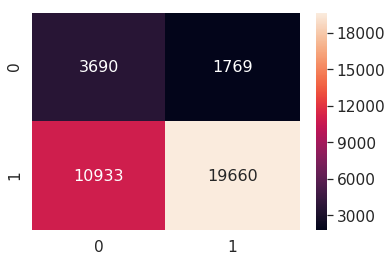

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_test_df2, annot=True, annot_kws={"size": 16}, fmt='g' )

### 2.4.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [0]:
alpha_2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
auc_3=[]
auc_4=[]
log_alpha_2=[]

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(alpha_2):
    clf=SGDClassifier(loss='hinge', alpha=i, class_weight='balanced')
    clf.fit(X_train_2, Ytr)
    Y_3=clf.predict(X_train_2)
    roc_auc_3=roc_auc_score(Ytr, Y_3)
    auc_3.append(roc_auc_3)
    Y_4=clf.predict(X_cv_2)
    roc_auc_4=roc_auc_score(Ycv, Y_4)
    auc_4.append(roc_auc_4)

100%|██████████| 9/9 [00:09<00:00,  1.07it/s]


In [0]:
log_alpha_2=[math.log(i) for i in alpha_2]
log_alpha_2

[-9.210340371976182,
 -6.907755278982137,
 -4.605170185988091,
 -2.3025850929940455,
 0.0,
 2.302585092994046,
 4.605170185988092,
 6.907755278982137,
 9.210340371976184]

Auc values v/s log(alpha) plot:-

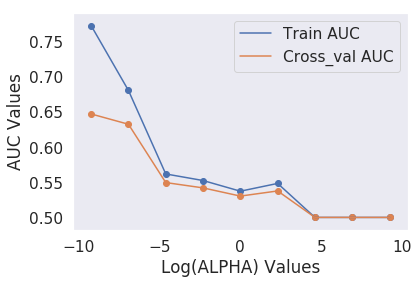

In [0]:
plt.plot(log_alpha_2, auc_3, label='Train AUC')
plt.plot(log_alpha_2, auc_4, label='Cross_val AUC')
plt.scatter(log_alpha_2, auc_3)
plt.scatter(log_alpha_2, auc_4)
plt.xlabel('Log(ALPHA) Values')
plt.ylabel('AUC Values')
plt.legend()
plt.grid()
plt.show()

In [0]:
print('From the above plot, C={} results on decent scores on both train and CV data'.format(0.001))

From the above plot, C=0.001 results on decent scores on both train and CV data


# AUC on test data:-

In [0]:
SVM_2=SGDClassifier(loss='hinge', alpha=0.001, class_weight='balanced')
SVM_2.fit(X_train_2, Ytr)
y_pred= SVM_2.predict(X_test_2)
roc_auc= roc_auc_score(Ytest, y_pred)
print('The AUC score on test data is: {}'.format(roc_auc))

The AUC score on test data is: 0.6396256347937889


# ROC Curve:-

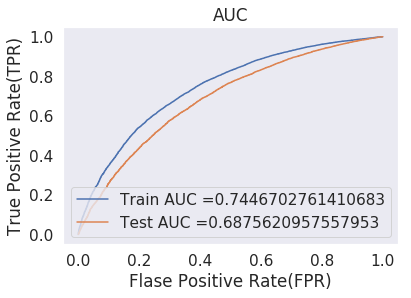

In [0]:
clf=SGDClassifier(alpha=0.001, loss='hinge', class_weight='balanced')
clf_2=CalibratedClassifierCV(clf, method='sigmoid', cv=5)
clf_2.fit(X_train_2, Ytr)
y_3=clf_2.predict_proba(X_train_2)
Y_3=y_3[:,1]
y_4=clf_2.predict_proba(X_test_2)
Y_4=y_4[:,1]
train_fpr_2, train_tpr_2, train_threshold_2 = roc_curve(Ytr, Y_3)
test_fpr_2, test_tpr_2, test_thresholds_2 = roc_curve(Ytest, Y_4) 
plt.plot(train_fpr_2, train_tpr_2, label="Train AUC ="+str(auc(train_fpr_2, train_tpr_2))) 
plt.plot(test_fpr_2, test_tpr_2, label="Test AUC ="+str(auc(test_fpr_2, test_tpr_2))) 
plt.legend() 
plt.xlabel("Flase Positive Rate(FPR)") 
plt.ylabel("True Positive Rate(TPR)") 
plt.title("AUC") 
plt.grid() 
plt.show()

# Observations:-

In [0]:
print(' The AUC scores with best alpha={} on train and test data are {} and {}'.format(0.001, auc(train_fpr_2, train_tpr_2), auc(test_fpr_2, test_tpr_2)))

 The AUC scores with best alpha=0.001 on train and test data are 0.7446702761410683 and 0.6875620957557953


# Confusion Matrix on Train data:-

In [0]:
clf=SGDClassifier(alpha=0.001, loss='hinge', class_weight='balanced')
clf.fit(X_train_2, Ytr)
y_3=clf.predict(X_train_2)

y_4=clf.predict(X_test_2)

from sklearn.metrics import confusion_matrix
confusion_matrix(Ytr, y_3)

array([[ 5234,  2192],
       [14401, 27214]])

In [0]:
conf_matrix_train2=pd.DataFrame(confusion_matrix(Ytr, y_3))

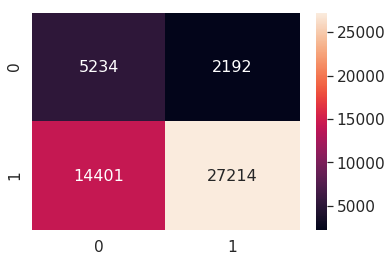

In [0]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(conf_matrix_train2, annot=True,annot_kws={"size": 16}, fmt='g')

# Confusion Matrix on Test data:-

In [0]:
confusion_matrix(Ytest, y_4)

array([[ 3432,  2027],
       [10769, 19824]])

In [0]:
confusion_matrix_df2_test=pd.DataFrame(confusion_matrix(Ytest, y_4))

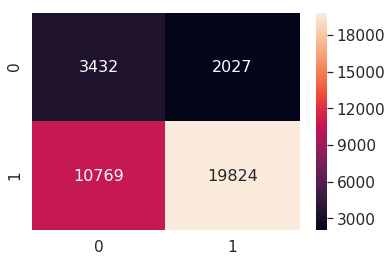

In [0]:
sns.set(font_scale=1.4)#for label size 
sns.heatmap(confusion_matrix_df2_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying Logistic Regression on Avg_W2V,<font color='red'> SET 3</font>

In [0]:
alpha_3=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
auc5=[]
auc6=[]
log_alpha_3=[]

In [0]:
from sklearn.linear_model import SGDClassifier
for i in tqdm(alpha_3):
  clf=SGDClassifier(loss='hinge', alpha=i, class_weight='balanced')
  clf.fit(X_train_3, Ytr)
  y_3=clf.predict(X_train_3)
  auc_1=roc_auc_score(Ytr, y_3)
  auc5.append(auc_1)
  y_4=clf.predict(X_test_3)
  auc_2=roc_auc_score(Ytest, y_4)
  auc6.append(auc_2)

100%|██████████| 9/9 [00:35<00:00,  3.04s/it]


In [0]:
log_alpha_3=[math.log(i) for i in alpha_3]

Log(C) v/s AUC plot:-

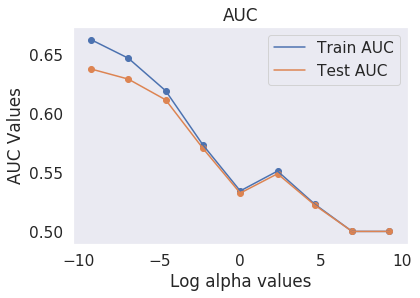

In [0]:
plt.plot(log_alpha_3, auc5, label='Train AUC')
plt.plot(log_alpha_3, auc6, label='Test AUC')
plt.scatter(log_alpha_3, auc5)
plt.scatter(log_alpha_3, auc6)
plt.xlabel('Log alpha values')
plt.ylabel('AUC Values')
plt.grid()
plt.legend()
plt.title('AUC')
plt.show()

In [0]:
print('From the above plot, C={} results on decent scores on both train and CV data'.format(0.001))

From the above plot, C=0.001 results on decent scores on both train and CV data


ROC CURVE:-

In [0]:
#As all the alpha values result in similar scores on train and test data, we will go with alpha=0.001

clf=SGDClassifier(loss='hinge', alpha=0.001, class_weight='balanced')
clf_3=CalibratedClassifierCV(clf, method='sigmoid', cv=5)
clf_3.fit(X_train_3, Ytr)
y_5=clf_3.predict_proba(X_train_3)
Y_5=y_5[:,1]
train_fpr, train_tpr, train_threshold = roc_curve(Ytr, Y_5)
y_6=clf_3.predict_proba(X_test_3)
Y_6=y_6[:,1]
test_fpr, test_tpr, test_threshold = roc_curve(Ytest, Y_6)


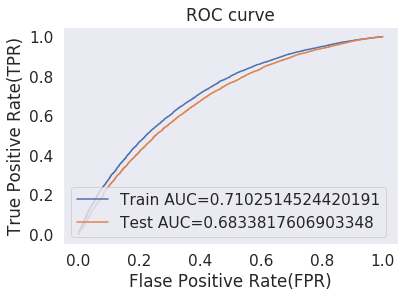

In [0]:
plt.plot(train_fpr, train_tpr, label='Train AUC='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test AUC='+str(auc(test_fpr, test_tpr)))
plt.xlabel("Flase Positive Rate(FPR)") 
plt.ylabel("True Positive Rate(TPR)") 
plt.grid()
plt.legend()
plt.title('ROC curve')
plt.show()

# Confusion matrix on Train data:-

In [0]:
clf=SGDClassifier(alpha=0.001, loss='hinge', class_weight='balanced')
clf.fit(X_train_3, Ytr)
y_5=clf.predict(X_train_3)
y_6=clf.predict(X_test_3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytr, y_5))

[[ 4867  2559]
 [14593 27022]]


In [0]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(Ytr, y_5))

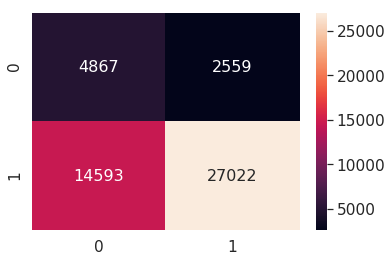

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_3, annot = True, annot_kws={'size':16}, fmt='g')

# Confusion Matrix on test data:-

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, y_6))

[[ 3376  2083]
 [10724 19869]]


In [0]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(Ytest, y_6))

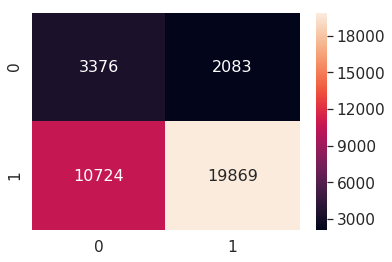

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_3, annot=True, annot_kws={'size':16}, fmt='g')

### 4 Applying Logistic Regression on TFIDF_W2V,<font color='blue'> SET 4</font>

In [0]:
alpha_4=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
auc_7=[]
auc_8=[]
log_alpha_4=[]

In [0]:
from sklearn.metrics import roc_auc_score
for i in tqdm(alpha_2):
    clf=SGDClassifier(loss='hinge', alpha=i, class_weight='balanced')
    clf.fit(X_train_4, Ytr)
    Y_3=clf.predict(X_train_4)
    roc_auc_3=roc_auc_score(Ytr, Y_3)
    auc_7.append(roc_auc_3)
    Y_4=clf.predict(X_cv_4)
    roc_auc_4=roc_auc_score(Ycv, Y_4)
    auc_8.append(roc_auc_4)

100%|██████████| 9/9 [00:35<00:00,  2.91s/it]


In [0]:
log_alpha_4=[math.log(i) for i in alpha_4]

Log C v/s AUC:-

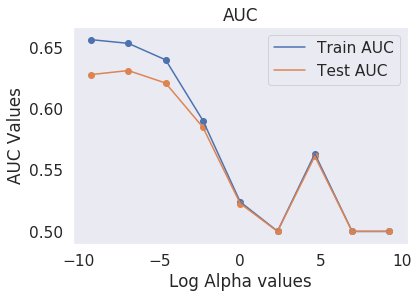

In [0]:
plt.plot(log_alpha_4, auc_7, label='Train AUC')
plt.plot(log_alpha_4, auc_8, label='Test AUC')
plt.scatter(log_alpha_4, auc_7)
plt.scatter(log_alpha_4, auc_8)
plt.xlabel('Log Alpha values')
plt.ylabel('AUC Values')
plt.grid()
plt.legend()
plt.title('AUC')
plt.show()

In [0]:
print('C={} results in decect scores on train and CV data'.format(0.001))

C=0.001 results in decect scores on train and CV data


ROC Curve:-

In [0]:
clf=SGDClassifier(alpha=0.001, loss='hinge', class_weight='balanced')
clf_4=CalibratedClassifierCV(clf, method='sigmoid', cv=5)
clf_4.fit(X_train_4, Ytr)
y_7=clf_4.predict_proba(X_train_4)
Y_7=y_7[:,1]
train_fpr, train_tpr, train_threshold = roc_curve(Ytr, Y_7)
y_8=clf_4.predict_proba(X_test_4)
Y_8=y_8[:,1]
train_fpr, train_tpr, train_threshold = roc_curve(Ytest, Y_8)


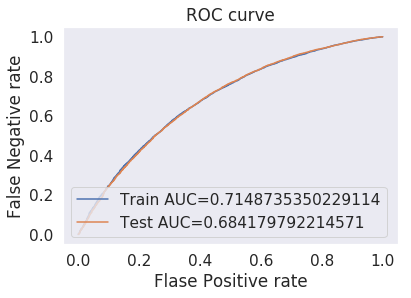

In [0]:
plt.plot(train_fpr, train_tpr, label='Train AUC='+str(roc_auc_score(Ytr, Y_7)))
plt.plot(test_fpr, test_tpr, label='Test AUC='+str(roc_auc_score(Ytest, Y_8)))
plt.xlabel('Flase Positive rate')
plt.ylabel('False Negative rate')
plt.grid()
plt.title('ROC curve')
plt.legend()
plt.show()

# Confusion Matrix on Train data:-

In [0]:
clf=SGDClassifier(alpha=0.001, loss='hinge', class_weight='balanced')

clf.fit(X_train_4, Ytr)
y_7=clf.predict(X_train_4)
y_8=clf.predict(X_test_4)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytr, y_7))

[[ 4805  2621]
 [13778 27837]]


In [0]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(Ytr, y_7))

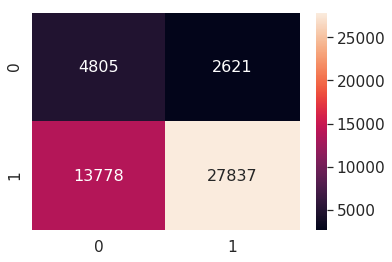

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_4, annot=True, annot_kws={'size':16}, fmt='g')

Confusion Matrix on Test data:-

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, y_8))

[[ 3312  2147]
 [10264 20329]]


In [0]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(Ytest, y_8))

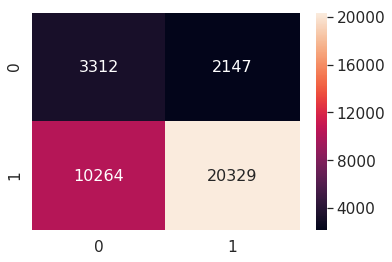

In [0]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_4, annot=True, annot_kws={'size':16}, fmt='g')

### 5 Applying Logistic Regression on Numerical+categorical data,<font color='green'> SET 5</font>

Consider these set of features Set 5 :

school_state : categorical data

clean_categories : categorical data

clean_subcategories : categorical data

project_grade_category :categorical data

teacher_prefix : categorical data

quantity : numerical data

teacher_number_of_previously_posted_projects : numerical data

price : numerical data

sentiment score's of each of the essay : numerical data

number of words in the title : numerical data

number of words in the combine essays : numerical data

And apply the Logistic regression on these features by finding the best hyper paramter as 
suggested in step 2 and step 3 

 No of words in essay:-

In [0]:
essay_count_1=[]
for sentance in preprocessed_1:
  essay_count_1.append(len(sentance.split()))

In [0]:
essay_count_2=[]
for sentance in preprocessed_2:
  essay_count_2.append(len(sentance.split()))

In [0]:
essay_count_3=[]
for sentance in preprocessed_3:
  essay_count_3.append(len(sentance.split()))

In [0]:
len(essay_count_1)

49041

 No of words in title:-

In [0]:
title_1=[]
for sentance in preprocessed_title_1:
  title_1.append(len(sentance.split()))

In [0]:
title_2=[]
for sentance in preprocessed_title_2:
  title_2.append(len(sentance.split()))

In [0]:
title_3=[]
for sentance in preprocessed_title_3:
  title_3.append(len(sentance.split()))

In [0]:
len(title_3)

 Sentiment's score of each essay:-

In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [0]:
neg_1=[]
neu_1=[]
pos_1=[]
compound_1=[]



for i in preprocessed_1:
  ss = sid.polarity_scores(i)

  compound_1.append(ss['compound'])
  neg_1.append(ss['neg'])
  neu_1.append(ss['neu'])
  pos_1.append(ss['pos'])


In [0]:
neg_2=[]
neu_2=[]
pos_2=[]
compound_2=[]



for i in preprocessed_2:
  k = sid.polarity_scores(i)
  compound_2.append(k['compound'])
  neg_2.append(k['neg'])
  neu_2.append(k['neu'])
  pos_2.append(k['pos'])


In [0]:
neg_3=[]
neu_3=[]
pos_3=[]
compound_3=[]



for i in preprocessed_3:
  k = sid.polarity_scores(i)
  compound_3.append(k['compound'])
  neg_3.append(k['neg'])
  neu_3.append(k['neu'])
  pos_3.append(k['pos'])

In [0]:
ss

In [0]:
type(ss['compound'])

In [0]:
len(neg_3)

 Normalizing essay word count:-

In [0]:
import numpy as np
essay_count1=np.array(essay_count_1)
essay_count2=np.array(essay_count_2)
essay_count3=np.array(essay_count_3)

In [0]:
title1=np.array(title_1)
title2=np.array(title_2)
title3=np.array(title_3)

In [0]:
neg1=np.array(neg_1)
neg2=np.array(neg_2)
neg3=np.array(neg_3)
neg1.shape

(49041,)

In [0]:
neu1=np.array(neu_1)
neu2=np.array(neu_2)
neu3=np.array(neu_3)
neu1.shape

(49041,)

In [0]:
compound1=np.array(compound_1)
compound2=np.array(compound_2)
compound3=np.array(compound_3)
compound1.shape

(49041,)

In [0]:
pos1=np.array(pos_1)
pos2=np.array(pos_2)
pos3=np.array(pos_3)
pos1.shape

(49041,)

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essaycount = Normalizer()
essaycount.fit(essay_count1.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
essaycount1 = essaycount.transform(essay_count1.reshape(1,-1))
essaycount2 = essaycount.transform(essay_count2.reshape(1,-1))
essaycount3 = essaycount.transform(essay_count3.reshape(1,-1))
print(essaycount1.shape)
print(essaycount2.shape)
print(essaycount3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

titlecount = Normalizer()
titlecount.fit(title1.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
titlecount1 = titlecount.transform(title1.reshape(1,-1))
titlecount2 = titlecount.transform(title2.reshape(1,-1))
titlecount3 = titlecount.transform(title3.reshape(1,-1))
print(titlecount1.shape)
print(titlecount2.shape)
print(titlecount3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

neg = Normalizer()
neg.fit(neg1.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
negative1 = neg.transform(neg1.reshape(1,-1))
negative2 = neg.transform(neg2.reshape(1,-1))
negative3 = neg.transform(neg3.reshape(1,-1))
print(negative1.shape)
print(negative2.shape)
print(negative3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

pos = Normalizer()
pos.fit(pos1.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
positive1 = pos.transform(pos1.reshape(1,-1))
positive2 = pos.transform(pos2.reshape(1,-1))
positive3 = pos.transform(pos3.reshape(1,-1))
print(positive1.shape)
print(positive2.shape)
print(positive3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

compound = Normalizer()
compound.fit(compound1.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
comp1 = compound.transform(compound1.reshape(1,-1))
comp2 = compound.transform(compound2.reshape(1,-1))
comp3 = compound.transform(compound3.reshape(1,-1))
print(comp1.shape)
print(comp2.shape)
print(comp3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


In [0]:
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

neu = Normalizer()
neu.fit(neu1.reshape(1,-1)) # finding the mean and standard deviation of this data
#print(f"Mean : {previousproject_scalar.mean_[0]}, Standard deviation : {np.sqrt(previousproject_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
neutral1 = neu.transform(neu1.reshape(1,-1))
neutral2 = neu.transform(neu2.reshape(1,-1))
neutral3 = neu.transform(neu3.reshape(1,-1))
print(neutral1.shape)
print(neutral2.shape)
print(neutral3.shape)

(1, 49041)
(1, 36052)
(1, 24155)


Dimensionality Reduction on Set2:-

In [0]:


from sklearn.decomposition import TruncatedSVD

svd=TruncatedSVD()


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_8 = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_features=2000)
vectorizer_8.fit(preprocessed_1)
tf_idf_1 = vectorizer_8.transform(preprocessed_1)
tf_idf_2 = vectorizer_8.transform(preprocessed_2)
tf_idf_3 = vectorizer_8.transform(preprocessed_3)
print('The shape of essay tfidf train data is',tf_idf_1.shape)
print('The shape of essay tfidf test data is',tf_idf_2.shape)
print('The shape of essay tfidf CV data is',tf_idf_3.shape)

The shape of essay tfidf train data is (49041, 2000)
The shape of essay tfidf test data is (36052, 2000)
The shape of essay tfidf CV data is (24155, 2000)


In [0]:
svd.n_components = 1999

In [0]:
svd_data = svd.fit_transform(tf_idf_1)

In [0]:
perc_var_explained = svd.explained_variance_ / np.cumsum(svd.explained_variance_)
cum_var_explained = np.cumsum(perc_var_explained)

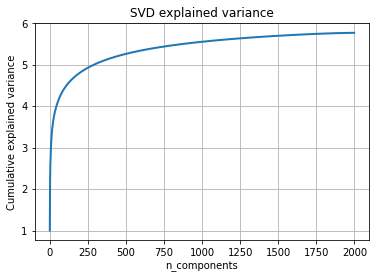

In [0]:
plt.figure(1, figsize=(6,4))
plt.plot( cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.title('SVD explained variance')
plt.show()

In [0]:
print('Even with 750 features, more than 90% info is retained.')

Even with 750 features, more than 90% info is retained.


 Applying SVD on TFIDF train, CV and Test data:-

In [0]:
svd_1=TruncatedSVD()
svd_1.n_components=750

svd_data_1=svd_1.fit_transform(tf_idf_1)
svd_data_2=svd_1.transform(tf_idf_2)
svd_data_3=svd_1.transform(tf_idf_3)

In [0]:
print(svd_data_1.shape)
print(svd_data_2.shape)
print(svd_data_3.shape)

(49041, 750)
(36052, 750)
(24155, 750)


In [0]:
from scipy.sparse import hstack
X_train_5 = hstack((subject_categories_vect_1, sub_categories_vect_1, school_state_vect_1, prefix_1, grade_category_vec_1, price_standardized_1.T, previousproject_standardized_1.T, quantity_vect_1.T, essaycount1.T, titlecount1.T, negative1.T, neutral1.T, comp1.T, positive1.T, svd_data_1))
print(X_train_5.shape)

from scipy.sparse import hstack
X_test_5 = hstack((subject_categories_vect_2, sub_categories_vect_2, school_state_vect_2, prefix_2, grade_category_vec_2, price_standardized_2.T, previousproject_standardized_2.T, quantity_vect_2.T, essaycount2.T, titlecount2.T, negative2.T, neutral2.T, comp2.T, positive2.T, svd_data_2))
print(X_test_5.shape)

from scipy.sparse import hstack
X_cv_5 = hstack((subject_categories_vect_3, sub_categories_vect_3, school_state_vect_3, prefix_3, grade_category_vec_3, price_standardized_3.T, previousproject_standardized_3.T, quantity_vect_3.T, essaycount3.T, titlecount3.T, negative3.T, neutral3.T, comp3.T, positive3.T, svd_data_3))
print(X_cv_5.shape)


(49041, 858)
(36052, 858)
(24155, 858)


###  Applying Logistic Regression on,<font color='red'> SET 5</font>

In [0]:
alpha_5 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
auc_9=[]
auc_10=[]
log_alpha_5=[]

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
for i in tqdm(alpha_5):
    clf=SGDClassifier(alpha=i, loss='hinge', class_weight='balanced')
    clf.fit(X_train_5, Ytr)
    Y_3=clf.predict(X_train_5)
    roc_auc_3=roc_auc_score(Ytr, Y_3)
    auc_9.append(roc_auc_3)
    Y_4=clf.predict(X_cv_5)
    roc_auc_4=roc_auc_score(Ycv, Y_4)
    auc_10.append(roc_auc_4)

100%|██████████| 9/9 [00:31<00:00,  2.98s/it]


In [0]:
import math
log_alpha_5=[math.log(i) for i in alpha_5]

Log C v/s AUC plot:-

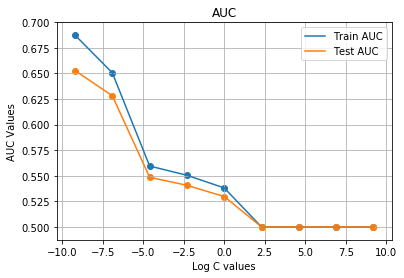

In [0]:
plt.plot(log_alpha_5, auc_9, label='Train AUC')
plt.plot(log_alpha_5, auc_10, label='Test AUC')
plt.scatter(log_alpha_5, auc_9)
plt.scatter(log_alpha_5, auc_10)
plt.xlabel('Log C values')
plt.ylabel('AUC Values')
plt.grid()
plt.legend()
plt.title('AUC')
plt.show()

In [0]:
print('The best value of alpha={} results in AUC={} and {} on train and test data'.format(0.001, auc_9[1], auc_10[1]))

The best value of alpha=0.001 results in AUC=0.6506409364255901 and 0.6281965509457121 on train and test data


ROC Curve:-

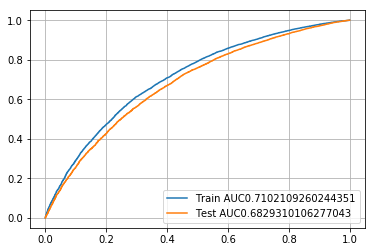

In [0]:
from sklearn.calibration import CalibratedClassifierCV

clf=SGDClassifier(alpha=0.001, loss='hinge', class_weight='balanced')
clf_5=CalibratedClassifierCV(clf, method='sigmoid', cv=5)
clf_5.fit(X_train_5, Ytr)
y_9=clf_5.predict_proba(X_train_5)
Y_9=y_9[:,1]
train_fpr, train_tpr, train_threshold = roc_curve(Ytr, Y_9)
y_10=clf_5.predict_proba(X_test_5)
Y_10=y_10[:,1]
test_fpr, test_tpr, test_threshold = roc_curve(Ytest, Y_10)
plt.plot(train_fpr, train_tpr, label='Train AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test AUC'+str(auc(test_fpr, test_tpr)))
plt.grid()
plt.legend()
plt.show()

# Confusion Matrix on Train data:-

[[ 4949  2477]
 [15266 26349]]


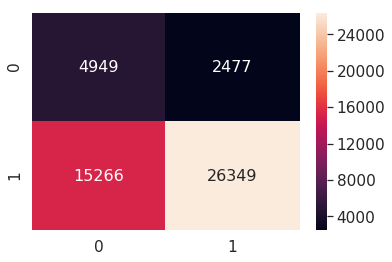

In [0]:
clf=SGDClassifier(alpha=0.001, loss='hinge', class_weight='balanced')
clf.fit(X_train_5, Ytr)
y_9=clf.predict(X_train_5)
train_fpr, train_tpr, train_threshold = roc_curve(Ytr, Y_9)
y_10=clf.predict(X_test_5)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytr, y_9))

conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(Ytr, y_9))

sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_train_5, annot=True, annot_kws={'size':16}, fmt='g')


Confusion Matrix on Test data:-

[[ 3435  2024]
 [11285 19308]]


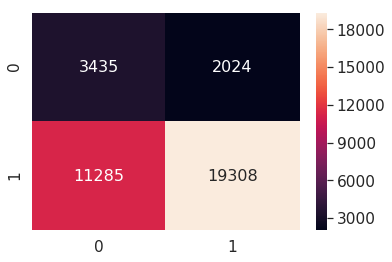

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, y_10))

conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(Ytest, y_10))

sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_test_5, annot=True, annot_kws={'size':16}, fmt='g')

### <font color='blue'> Summarizing results in table format:- </font>

In [1]:
from prettytable import PrettyTable

In [2]:
x = PrettyTable()

In [3]:
x.field_names=['Technique', 'Alpha_value', 'Train AUC score', 'Test AUC score']

In [4]:
x.add_row(['BOW', '0.01', '0.815', '0.712'])
x.add_row(['TFIDF', '0.001', '0.74', '0.69'])
x.add_row(['AVG-W2V', '0.001', '0.72', '0.69'])
x.add_row(['TFIDF_W2V', '0.001', '0.71', '0.68'])
x.add_row(['Sentiment_Analysis', '0.001', '0.71', '0.68'])
print(x)

+--------------------+-------------+-----------------+----------------+
|     Technique      | Alpha_value | Train AUC score | Test AUC score |
+--------------------+-------------+-----------------+----------------+
|        BOW         |     0.01    |      0.815      |     0.712      |
|       TFIDF        |    0.001    |       0.74      |      0.69      |
|      AVG-W2V       |    0.001    |       0.72      |      0.69      |
|     TFIDF_W2V      |    0.001    |       0.71      |      0.68      |
| Sentiment_Analysis |    0.001    |       0.71      |      0.68      |
+--------------------+-------------+-----------------+----------------+


# Conclusion:-

1. The BOW and TFIDF models perform better on both the train and test data compared to the 
remaining models.

2. The AUC scores on the train and test data using Avg_W2V and TFIDF_W2V models is similar 
but lower compared to the BOW and TFIDF models.

3. Sentiment Analaysis yields similar scores on train and test data but the model performance 
is the least among all the models.

4. The performance of the models built using Logistic Regresiion is lower compared to the models 
built using Naive Bayes on the same dataset.